# **K-Nearest Neighbors**
> KNN(K — Nearest Neighbors) é um dos muitos algoritmos ( de aprendizagem supervisionada ) usado no campo de data mining e machine learning, ele é um classificador onde o aprendizado é baseado “no quão similar” é um dado (um vetor) do outro. O treinamento é formado por vetores de n dimensões.

> Por exemplo, em um consultório médico, o especialista, a partir do conjunto de sintomas que descrevem o estado de saúde do paciente pode procurar, em fichas médicas de pacientes já diagnosticados, conjuntos de sintomas similares a este, no intuito de auxiliar no diagnóstico de determinada doença.

> **Diga-me com quem andas e eu te direi quem tu és**

> **Funcionamento**
  - Utiliza a similaridade entre os K pontos mais próximos do dataset para estimar o valor das novas obersavações.
  - O processamento é feito no momento da previsão e, por isso é chamado de "Aprendizado Preguiçoso" - isso pode ser muito custoso em dataset maiores e em modelos que é preciso uma previsão de forma imediata.
  - KNN se encaixa com variaveis em escalas diferentes.
  - **Etapas**
    - Recebe um dado não classificado;
    - Mede a distância (Euclidiana, Manhattan, Minkowski ou Ponderada) do novo dado com todos os outros dados que já estão classificados;
    - Obtém as X(no caso essa variável X é o parâmetro K) menores distâncias;
    - Verifica a classe de cada da um dos dados que tiveram a menor distância e conta a quantidade de cada classe que aparece;
    - Toma como resultado a classe que mais apareceu dentre os dados que tiveram as menores distâncias;
    - Classifica o novo dado com a classe tomada como resultado da classificação
  - **Calculo da distância**
    - Distância Euclidiana
      - 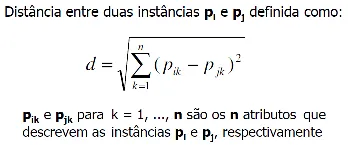

In [53]:
# https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier

# Bibliotecas
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

import pandas as pd
import matplotlib.pyplot as plt

## **EXEMPLO COM ÍRIS**

# Dados

In [54]:
# Dataset Iris
iris = load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target

In [55]:
iris1 = iris_df.loc[iris_df.target.isin([1,2]), ['petal length (cm)',	'petal width (cm)', 'target']]

In [56]:
iris1.head(3)

,petal length (cm),petal width (cm),target
50,4.7,1.4,1
51,4.5,1.5,1
52,4.9,1.5,1


In [57]:
X = iris1[['petal length (cm)',	'petal width (cm)']]
y = iris1.target

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

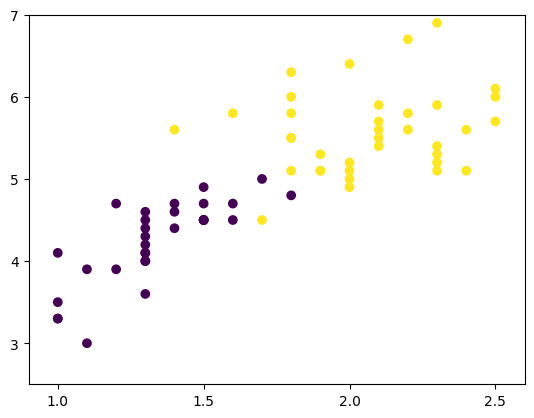

In [59]:
fig, ax = plt.subplots()
ax.scatter(x=X_train['petal width (cm)'],y=X_train['petal length (cm)'],c=y_train, cmap='viridis')
ax.set(xlim=(0.9, 2.6), xticks=[1,1.5,2,2.5], ylim=(2.5,7), yticks=[3,4,5,6,7])

plt.show()

## Construindo e Treinando o modelo

In [60]:
# KNN
clf = KNeighborsClassifier(n_neighbors=3)
clf = clf.fit(X_train, y_train)


# Métricas e Matriz de confusão

In [62]:
# Fazendo previsões
y_pred = clf.predict(X_test)

# Calculando e imprimindo o relatório de classificação
print(classification_report(y_test, y_pred, zero_division=1))

              precision    recall  f1-score   support

           1       0.76      1.00      0.86        19
           2       1.00      0.57      0.73        14

    accuracy                           0.82        33
   macro avg       0.88      0.79      0.80        33
weighted avg       0.86      0.82      0.81        33



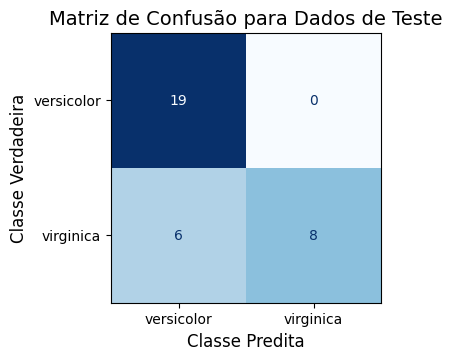

In [63]:
# Calculando a matriz de confusão

cm = confusion_matrix(y_test, y_pred)

# Exibindo a matriz de confusão graficamente
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['versicolor', 'virginica'])
fig, ax = plt.subplots(figsize=(4, 4))
disp.plot(ax=ax, cmap='Blues', colorbar=False)

# Melhorando o gráfico
ax.set_title('Matriz de Confusão para Dados de Teste', fontsize=14)
ax.set_xlabel('Classe Predita', fontsize=12)
ax.set_ylabel('Classe Verdadeira', fontsize=12)

plt.tight_layout()
plt.show()